# FA & Clustering

internal_metrics 만 필요하다!!

## FA

* 이상치 처리
* 요인 수
* 클러스터 개수

## 데이터 전처리
1. 버전 관련 제거
2. 모두 동일한 값 제거
3. 값이 2개인 경우 제거
4. 범주형 변수 제거

In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 가져오기

file_dir = '../data/'
file_name = 'internal_metrics_r10000_aof1.csv'

internalMetrics_df = pd.read_csv(file_dir+file_name)

In [3]:
# 1250 개 추출
internalMetrics_df.shape

(1000, 131)

### 0. role master 아닌 경우 제외

In [4]:
# master 부분 추출
idx_role_null = internalMetrics_df['role'] == 'master'
internalMetrics_df = internalMetrics_df[idx_role_null]

### 1. 버전 환경 관련 제거
* redis_version
* redis_builid_id
* os
* gcc_version
* Executable
* config_file
* tcp_port
* run_id
* process_id

In [5]:
# 버전, 환경 관련 변수
var1_noRel = [
    'redis_version', 
    'redis_build_id', 
    'os',
    'gcc_version',
    'executable',
    'config_file',
    'tcp_port',
    'run_id',
    'process_id',
    'master_replid'
]

In [6]:
# 버전, 환경 관련 변수 확인
var1_noRel

['redis_version',
 'redis_build_id',
 'os',
 'gcc_version',
 'executable',
 'config_file',
 'tcp_port',
 'run_id',
 'process_id',
 'master_replid']

In [7]:
# 변수 제거 
internalMetrics_df = internalMetrics_df.drop(columns = var1_noRel, axis=0)

In [8]:
len(internalMetrics_df.columns)

121

In [9]:
# 변수 제거 데이터프레임 확인
internalMetrics_df.head()

,redis_git_sha1,redis_git_dirty,redis_mode,arch_bits,multiplexing_api,atomicvar_api,uptime_in_seconds,uptime_in_days,hz,configured_hz,...,repl_backlog_first_byte_offset,repl_backlog_histlen,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,cluster_enabled,db0:keys,expires,avg_ttl
0,0,0,standalone,64,epoll,atomic-builtin,6,0,6,6,...,0,0,0.231712,0.102433,0.000000,0.000000,0,5000,0,0
1,0,0,standalone,64,epoll,atomic-builtin,6,0,18,18,...,0,0,0.246147,0.100983,0.000000,0.000000,0,5000,0,0
2,0,0,standalone,64,epoll,atomic-builtin,483,0,16,16,...,0,0,1.155518,0.506820,0.001195,0.002390,0,5000,0,0
3,0,0,standalone,64,epoll,atomic-builtin,6,0,2,2,...,0,0,0.277134,0.103668,0.000000,0.000000,0,5000,0,0
4,0,0,standalone,64,epoll,atomic-builtin,483,0,7,7,...,0,0,1.215523,0.382766,0.001959,0.001959,0,5000,0,0


### 2. 모두 동일한 값
fa의 경우 모두 동일한 값이 존재하면 실행 시 오류 발생

In [10]:
len(internalMetrics_df.columns)

121

In [11]:
def find_var_count(df, count):
    var = []
    
    for metric in df:
        if len(df[metric].unique()) == count:
            var.append(metric)
    return var

In [12]:
# 모두 동일한 값 가지고 있는 변수 리스트
# sameValue_var = []

# for metric in internalMetrics_df:
#     if len(internalMetrics_df[metric].unique()) == 1:
#         sameValue_var.append(metric)

# len(sameValue_var)

sameValue = find_var_count(internalMetrics_df, 1)

# 동일 값 변수 제거
internalMetrics_df = internalMetrics_df.drop(columns = sameValue, axis = 0)

### 3. 값이 2개인 경우 제거

In [13]:
# 값이 2개인 경우
twoVal_var = find_var_count(internalMetrics_df, 2)

internalMetrics_df = internalMetrics_df.drop(columns = twoVal_var, axis = 0)

In [14]:
len(internalMetrics_df.columns)

49

In [15]:
# latest_fork_usec, slave_expires_tracked_keys, maxmemory-polcy, 
# print(internalMetrics_df['slave_expires_tracked_keys'].unique())
# print(internalMetrics_df['latest_fork_usec'].unique())

### 4. 범주형 변수 제거

In [16]:
# maxmemory_policy만 제거해보고 해보기
del_col = ['maxmemory_policy']
# del_col = ['role','maxmemory_policy', 'slave_expires_tracked_keys', 'latest_fork_usec']
internalMetrics_df = internalMetrics_df.drop(columns = del_col, axis = 0)


In [17]:
# internalMetrics_df = pd.get_dummies(internalMetrics_df)
# internalMetrics_df.head()

In [18]:
# list(internalMetrics_df.dtypes)

In [19]:
# 컬럼 개수
len(internalMetrics_df.columns)

48

---

## Scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### standardscaler

In [21]:
std_scaler = StandardScaler()
df = internalMetrics_df.copy()
std_scaler.fit(internalMetrics_df)
internalMetrics_df = std_scaler.transform(internalMetrics_df)


In [22]:
# 표준펴차 확인
internalMetrics_df.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
internalMetrics_df = pd.DataFrame(internalMetrics_df, columns = df.columns, index = list(df.index.values))


In [24]:
internalMetrics_df.head()

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory,used_memory_human,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_misses,latest_fork_usec,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,db0:keys
0,-0.694134,-1.267939,-1.267939,-1.052629,-0.034167,-0.033106,-0.074192,-0.076905,-0.189661,-0.192137,...,-0.034985,-0.179861,-0.179855,0.018234,-0.137784,-0.766952,-0.752263,-0.611301,-0.571696,-0.039743
1,-0.694134,-0.229921,-0.229921,-1.052553,-0.032366,-0.033106,-0.265885,-0.269334,-0.188541,-0.192137,...,-0.034985,1.043098,1.043378,0.018234,-0.137784,-0.730844,-0.762178,-0.611301,-0.571696,-0.039743
2,1.460622,-0.402924,-0.402924,-1.050691,-0.032366,-0.033106,-0.217022,-0.221227,-0.188261,-0.192137,...,-0.034985,-1.226197,-1.226019,0.018234,0.093092,1.543863,2.012914,0.563665,1.705007,-0.039743
3,-0.694134,-1.613945,-1.613945,-1.050645,-0.032366,-0.033106,-0.243333,-0.240470,-0.188541,-0.192137,...,-0.034985,-0.880861,-0.881004,0.018234,-0.137784,-0.653333,-0.743818,-0.611301,-0.571696,-0.039743
4,1.460622,-1.181437,-1.181437,-1.048784,-0.032366,-0.033106,-0.318506,-0.317442,-0.188261,-0.192137,...,-0.034985,-1.223834,-1.223738,0.018234,0.064232,1.693960,1.164639,1.314856,1.294438,-0.039743


### minmaxscaler

In [25]:
# # 객체생성
# scaler = MinMaxScaler()

# # fit -> transform
# scaler.fit(internalMetrics_df) # df는 2차원 이상의 값이어야 함
# internalMetrics_df_MinMax = scaler.transform(internalMetrics_df.copy())

# # 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
# internalMetrics_df_MinMax = pd.DataFrame(data = internalMetrics_df_MinMax, columns=internalMetrics_df.columns)

In [26]:
# internalMetrics_df_MinMax.head()

---

## Factor Analysis

In [27]:
internalMetrics_df

,uptime_in_seconds,hz,configured_hz,lru_clock,used_memory,used_memory_human,used_memory_rss,used_memory_rss_human,used_memory_peak,used_memory_peak_human,...,total_net_output_bytes,instantaneous_input_kbps,instantaneous_output_kbps,keyspace_misses,latest_fork_usec,used_cpu_sys,used_cpu_user,used_cpu_sys_children,used_cpu_user_children,db0:keys
0,-0.694134,-1.267939,-1.267939,-1.052629,-0.034167,-0.033106,-0.074192,-0.076905,-0.189661,-0.192137,...,-0.034985,-0.179861,-0.179855,0.018234,-0.137784,-0.766952,-0.752263,-0.611301,-0.571696,-0.039743
1,-0.694134,-0.229921,-0.229921,-1.052553,-0.032366,-0.033106,-0.265885,-0.269334,-0.188541,-0.192137,...,-0.034985,1.043098,1.043378,0.018234,-0.137784,-0.730844,-0.762178,-0.611301,-0.571696,-0.039743
2,1.460622,-0.402924,-0.402924,-1.050691,-0.032366,-0.033106,-0.217022,-0.221227,-0.188261,-0.192137,...,-0.034985,-1.226197,-1.226019,0.018234,0.093092,1.543863,2.012914,0.563665,1.705007,-0.039743
3,-0.694134,-1.613945,-1.613945,-1.050645,-0.032366,-0.033106,-0.243333,-0.240470,-0.188541,-0.192137,...,-0.034985,-0.880861,-0.881004,0.018234,-0.137784,-0.653333,-0.743818,-0.611301,-0.571696,-0.039743
4,1.460622,-1.181437,-1.181437,-1.048784,-0.032366,-0.033106,-0.318506,-0.317442,-0.188261,-0.192137,...,-0.034985,-1.223834,-1.223738,0.018234,0.064232,1.693960,1.164639,1.314856,1.294438,-0.039743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.694134,-1.354440,-1.354440,-0.232463,-0.032366,-0.033106,-0.247091,-0.250091,-0.188541,-0.192137,...,-0.034985,-0.358078,-0.358065,0.018234,-0.137784,-0.685203,-0.611962,-0.611301,-0.571696,-0.039743
996,-0.694134,0.548592,0.548592,-0.232418,-0.032366,-0.033106,-0.239574,-0.240470,-0.188261,-0.192137,...,-0.034985,1.118259,1.118369,0.018234,-0.137784,-0.648453,-0.777426,-0.611301,-0.571696,-0.039743
997,-0.694134,0.289088,0.289088,-0.232368,-0.032816,-0.033106,-0.265885,-0.269334,-0.189661,-0.192137,...,-0.034985,0.889259,0.889119,0.018234,-0.137784,-0.627691,-0.713868,-0.611301,-0.571696,-0.039743
998,1.736178,1.413607,1.413607,-0.230274,-0.032366,-0.033106,-0.145607,-0.144255,-0.188541,-0.192137,...,-0.034985,-1.225606,-1.225734,0.018234,0.073016,1.657046,1.718246,1.609827,0.145608,-0.039743


In [28]:
# # 상관성 높은 normal에서 .. df 구성
# corr_knob = ['allocator_allocated',
#  'allocator_rss_bytes',
#  'used_memory_rss',
#  'allocator_resident',
#  'allocator_frag_bytes',
#  'rss_overhead_bytes',
#  'uptime_in_seconds',
#  'mem_fragmentation_bytes',
#  'used_memory_peak',
#  'configured_hz',
#  'used_cpu_sys',
#  'maxmemory',
#  'hz',
#  'used_cpu_user',
#  'used_memory_rss_human',
#  'maxmemory_human',
#  'allocator_rss_ratio']

# internalMetrics_normal_df = internalMetrics_df.copy()[corr_knob]

In [29]:
import itertools

# singular Error 발생시키는 변수 확인
def find_singularError_var(df, count):
    sin_rel_var = []

    for var in itertools.combinations(df.columns, count):
        new_df = internalMetrics_df[list(var)]
        try:
            fa_func = FactorAnalyzer(n_factors=2, rotation='varimax')
            fa_func.fit(new_df)        
        except :
            print(list(var))
            sin_rel_var += list(var)
            continue
    sin_rel_var = list(set(sin_rel_var))
    return sin_rel_var

        
sin_rel_var = find_singularError_var(internalMetrics_df, 2)
# hz, configured_hz, total_net_output_bytes, keyspace_hits, keyspace_misses 5개! -> 3개를 생략해야 한다!!

['hz', 'configured_hz']


In [30]:
# singluar error를 발생시키는 변수 삭제 -> 추후 조정 필요 상관계수 보면서!
drop_val = ['configured_hz']
internalMetrics_df_drop = internalMetrics_df.drop(columns = drop_val, axis = 0)

find_singularError_var(internalMetrics_df_drop, 2)

[]

In [31]:
# 커럼 개수 25개로 줄여짐
len(internalMetrics_df_drop.columns)

47

---

### 이상치 제거

In [32]:
# # 히스토그램으로 살펴보기
# internalMetrics_df.hist(figsize=(20, 20), bins=30)

In [33]:
# import numpy as np

# def get_outlier(df=None, column=None, weight=1.5):
    
#     # target 값과 상관관계가 높은 열을 우선적으로 진행
#     quantile_25 = np.percentile(df[column].values, 25)
#     quantile_75 = np.percentile(df[column].values, 75)

#     IQR = quantile_75 - quantile_25
#     IQR_weight = IQR*weight

#     lowest = quantile_25 - IQR_weight
#     highest = quantile_75 + IQR_weight

#     outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
#     return outlier_idx

In [34]:
# col = internalMetrics_df_drop.columns.tolist()
# outlier_idx = []

# # 컬럼별로 접근해서 인덱스 가져온다.
# for col_name in col:
#     idx = get_outlier(internalMetrics_df_drop, col_name)
#     outlier_idx += list(idx)

# outlier_idx = list(set(outlier_idx))  # 인데스 중복 삭제

# # 인덱스 개수가 너무 많다. -> 몇개만 골라서 삭제하자
# print(len(outlier_idx))

In [35]:
# # internal unique 한 결과 이상치 하나 삭제하는게 낫다고 판단 
# # uptime_in_seconds = [  22   21   23 3304   25   24   26   27]
# for i in internalMetrics_df_drop:
#     print(i)
#     print(internalMetrics_df_drop[i].unique())

In [36]:
# # used_memory_rss
# used_memory_rss_idx = get_outlier(internalMetrics_df_drop, 'used_memory_rss')

# internalMetrics_df_drop.drop(used_memory_rss_idx, axis=0)['used_memory_rss'].hist()

---

### 요인수 선택
* 요인 적재값
* 공통성
* 
* 클러스터링 개수 -> 각 클러스터마다 동등한 개수였으면 좋겠다

In [37]:
def factor_analysis(n_factors, df):
    fa = FactorAnalyzer(n_factors = n_factors, rotation='varimax')  # 객체 생성
    fa.fit(df)  # fitting
    df_fa = pd.DataFrame(fa.loadings_, index = df.columns)  # 데이터프레임으로 전달
    ev, v = fa.get_eigenvalues()
    return df_fa, ev

In [38]:
internalMetrics_fa, ev = factor_analysis(8, internalMetrics_df_drop)  ## 전체 데이터

# internalMetrics_df_drop = internalMetrics_normal_df
# internalMetrics_fa, ev = factor_analysis(6, internalMetrics_normal_df)  # 상관성 높은걸로 줄인거


In [39]:
# 요인수 선택 방법1 -> 요인수와 상관없다.
print(pd.DataFrame(ev))

               0
0   1.084727e+01
1   9.371528e+00
2   6.456625e+00
3   5.062422e+00
4   2.698820e+00
5   1.938238e+00
6   1.658914e+00
7   1.544913e+00
8   1.391640e+00
9   9.668612e-01
10  9.577547e-01
11  8.400773e-01
12  5.967451e-01
13  5.657153e-01
14  5.209094e-01
15  4.123952e-01
16  3.663618e-01
17  3.161651e-01
18  1.326875e-01
19  1.075993e-01
20  7.884819e-02
21  4.624313e-02
22  3.680328e-02
23  2.690879e-02
24  1.637778e-02
25  1.365416e-02
26  1.133263e-02
27  7.851827e-03
28  3.145432e-03
29  2.885144e-03
30  1.158570e-03
31  8.873508e-04
32  1.697591e-04
33  4.421308e-05
34  3.971813e-05
35  4.673213e-06
36  2.965097e-06
37  1.004816e-07
38  5.696535e-09
39  1.052661e-09
40  4.595014e-10
41  3.736389e-15
42  3.736950e-16
43 -2.721688e-16
44 -9.274881e-16
45 -1.393042e-15
46 -3.272854e-15


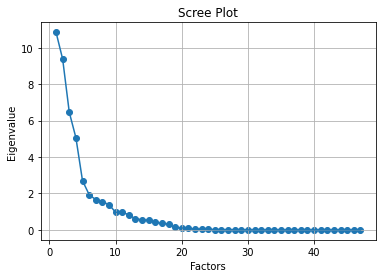

In [40]:
# 요인수 선택 방법2 -> 요인수와 상관없다
plt.scatter(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.plot(range(1,internalMetrics_df_drop.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<AxesSubplot:>

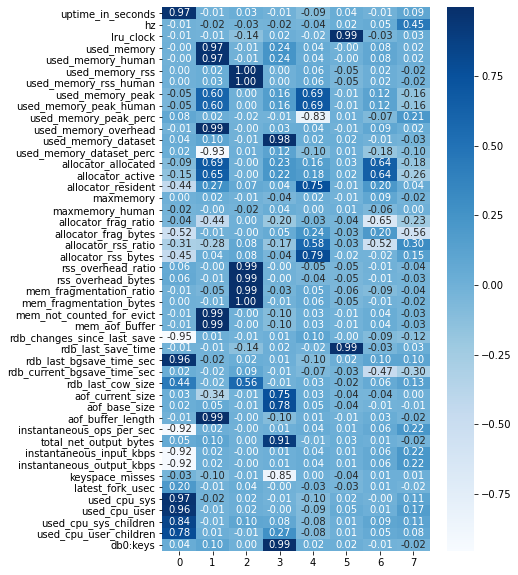

In [41]:
# 요인수 선택 방법3
# internal_metrics들이 포함되는 요인들 확인 -> 세로출이 거의다 포함되면 좋다.
plt.figure(figsize=(6,10))
sns.heatmap(internalMetrics_fa, cmap="Blues", annot=True, fmt='.2f')

---

## Clustering

In [42]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(internalMetrics_fa)

In [43]:
from sklearn.cluster import KMeans
def kmeans(n_clusters, df):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(df)
    
    df['cluster'] = kmeans.labels_
    
    return df

In [44]:
kmeans_df = kmeans(2, internalMetrics_fa)

In [45]:
# 클러스터 개수 확인 함수
def clusters(df):
    
    # 총 개수 확인
    print(df['cluster'].value_counts())
    print()
    
    count_cluster = len(df['cluster'].unique())
    new_df = pd.DataFrame()
    metric_list = []
    
    for i in range(count_cluster):
        metric_list = list(df[df['cluster'] == i].index)
        print("len = {}".format(len(df[df['cluster'] == i])))
        print("cluster{}".format(i))
        for metric in metric_list:
            print(metric)
        print()
        
    return new_df

In [46]:
df = clusters(kmeans_df)

0    26
1    21
Name: cluster, dtype: int64

len = 26
cluster0
uptime_in_seconds
hz
lru_clock
used_memory_rss
used_memory_rss_human
used_memory_peak_perc
used_memory_dataset_perc
maxmemory
maxmemory_human
allocator_frag_ratio
allocator_rss_ratio
rss_overhead_ratio
rss_overhead_bytes
mem_fragmentation_ratio
mem_fragmentation_bytes
rdb_last_save_time
rdb_last_bgsave_time_sec
rdb_current_bgsave_time_sec
rdb_last_cow_size
aof_current_size
keyspace_misses
latest_fork_usec
used_cpu_sys
used_cpu_user
used_cpu_sys_children
used_cpu_user_children

len = 21
cluster1
used_memory
used_memory_human
used_memory_peak
used_memory_peak_human
used_memory_overhead
used_memory_dataset
allocator_allocated
allocator_active
allocator_resident
allocator_frag_bytes
allocator_rss_bytes
mem_not_counted_for_evict
mem_aof_buffer
rdb_changes_since_last_save
aof_base_size
aof_buffer_length
instantaneous_ops_per_sec
total_net_output_bytes
instantaneous_input_kbps
instantaneous_output_kbps
db0:keys



### Elbow

In [47]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

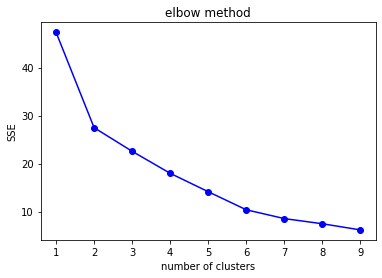

In [48]:
# 확 꺽이는 지점을 선택해야 한다. 
elbow(internalMetrics_fa, 10)

In [49]:
# def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
#     clusters_range = range(2,15)
#     results = []

#     for i in clusters_range:
#         clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
#         cluster_labels = clusterer.fit_predict(data)
#         silhouette_avg = silhouette_score(data, cluster_labels)
#         results.append([i, silhouette_avg])

#     result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
#     pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

#     plt.figure()
#     sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
#     plt.tight_layout()
#     plt.show()